# Demo EEFxTMS_2F (equatorial electric field)

> Authors: Ashley Smith
>
> Abstract: Access to the equatorial electric field (level 2 product).

In [1]:
# %load_ext watermark
# %watermark -i -v -p viresclient,pandas,xarray,matplotlib

In [2]:
from viresclient import SwarmRequest
import datetime as dt
import numpy as np

request = SwarmRequest()

## EEFxTMS_2F product information

Dayside equatorial electric field, sampled at every dayside equator crossing +- 20mins


Documentation:
- https://earth.esa.int/web/guest/missions/esa-eo-missions/swarm/data-handbook/level-2-product-definitions#EEFxTMS_2F

### Check what "EEF" data variables are available

In [3]:
request.available_collections("EEF", details=False)

{'EEF': ['SW_OPER_EEFATMS_2F', 'SW_OPER_EEFBTMS_2F']}

In [4]:
request.available_measurements("EEF")

['EEF', 'RelErr', 'flags']

## Fetch all the EEF values from Bravo during 2016

In [5]:
request.set_collection("SW_OPER_EEFBTMS_2F")
request.set_products(measurements=["EEF"])
data = request.get_between(
    dt.datetime(2016,1,1),
    dt.datetime(2017,1,1)
)

[1/1] Processing:  100%|██████████|  [ Elapsed: 00:03, Remaining: 00:00 ]
      Downloading: 100%|██████████|  [ Elapsed: 00:00, Remaining: 00:00 ] (0.246MB)


In [6]:
data.sources[:3], data.sources[-3:]

(['SW_OPER_EEFBTMS_2F_20160101T005224_20160101T225919_0103',
  'SW_OPER_EEFBTMS_2F_20160102T003414_20160102T224110_0103',
  'SW_OPER_EEFBTMS_2F_20160103T001603_20160103T222302_0103'],
 ['SW_OPER_EEFBTMS_2F_20161228T003534_20161228T224107_0102',
  'SW_OPER_EEFBTMS_2F_20161229T001641_20161229T222215_0102',
  'SW_OPER_EEFBTMS_2F_20161229T235749_20161230T233857_0102'])

In [7]:
df = data.as_dataframe()
df.head()

,EEF,Spacecraft,Latitude,Longitude
2016-01-01 00:52:25,-0.000758,B,7.187098,113.751205
2016-01-01 02:27:08,-0.000659,B,7.466371,89.976870
2016-01-01 04:02:05,-0.000349,B,6.861260,66.179520
2016-01-01 05:36:45,-0.000203,B,7.330604,42.410120
2016-01-01 07:10:50,-0.000235,B,10.010381,18.697549


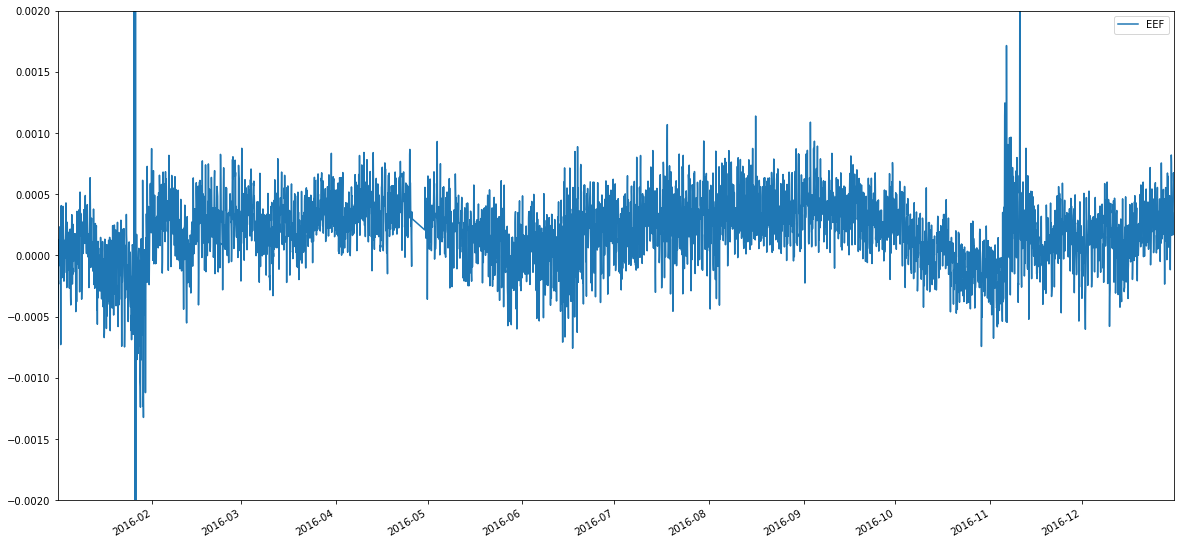

In [8]:
ax = df.plot(y="EEF", figsize=(20,10))
ax.set_ylim((-0.002, 0.002));

Take a look at the time jumps between entries...

In [9]:
times = df.index
np.unique(np.sort(np.diff(times.to_pydatetime())))[:20]

array([datetime.timedelta(days=-1, seconds=1117), datetime.timedelta(0),
       datetime.timedelta(seconds=2561), datetime.timedelta(seconds=2616),
       datetime.timedelta(seconds=2620), datetime.timedelta(seconds=2712),
       datetime.timedelta(seconds=2786), datetime.timedelta(seconds=2838),
       datetime.timedelta(seconds=2901), datetime.timedelta(seconds=3011),
       datetime.timedelta(seconds=3066), datetime.timedelta(seconds=3126),
       datetime.timedelta(seconds=5489), datetime.timedelta(seconds=5490),
       datetime.timedelta(seconds=5491), datetime.timedelta(seconds=5492),
       datetime.timedelta(seconds=5493), datetime.timedelta(seconds=5494),
       datetime.timedelta(seconds=5495), datetime.timedelta(seconds=5496)],
      dtype=object)

In [10]:
ds = data.as_xarray()
ds

<xarray.Dataset>
Dimensions:     (Timestamp: 5503)
Coordinates:
  * Timestamp   (Timestamp) datetime64[ns] 2016-01-01T00:52:25 ... 2016-12-30T23:38:58
Data variables:
    Spacecraft  (Timestamp) object 'B' 'B' 'B' 'B' 'B' ... 'B' 'B' 'B' 'B' 'B'
    EEF         (Timestamp) float64 -0.0007581 -0.0006586 ... 0.0006749 0.000611
    Longitude   (Timestamp) float64 113.8 89.98 66.18 ... -108.7 -132.6 -156.4
    Latitude    (Timestamp) float64 7.187 7.466 6.861 ... -7.104 -3.499 -0.3318
Attributes:
    Sources:         ['SW_OPER_EEFBTMS_2F_20160101T005224_20160101T225919_010...
    MagneticModels:  []
    RangeFilters:    []